## Clustering

- group similar data points together based on certain characteristics they share
- unsupervised learning
- data doesn't have predefined labels
- identify patterns or similarities within the data and groups them accordingly

### Popular Algorithms
1. K-Means
2. Hierarchical Clustering
3. DBSCAN
4. Mean Shift

### Application
1. Customer segmentation for target marketing
2. Image segmentation in computer vision
3. Anomaly detection
4. analyze and categorize gene expression data
5. organizing search results into groups for more structured information retrieval
6. Clustering weather to identify similar weather conditions for weather forecasting or climate analysis

these are just some of the many real-world use cases for unsupervised machine learning

### Popularly used evaluation metrics

1. **Silhouette Score:** :calculate cohesion and compares separation
    
2. **Davies-Bouldin Index:**  measures average similarity between each cluster and its most similar one

4. **Rand Index and Adjusted Rand Index:** compare similarity between the true labels and the clusters produced by the algorithm

5. **Homogeneity, Completeness, and V-measure:** evaluate the purity and completeness of clusters.
    - Homogeneity: measures if each cluster contains only members of a single class
    - Completeness: measures if all members of a given class are assigned to the same cluster
    - V-measure: harmonic mean of homogeneity and completeness

6. **Entropy:** measures the randomness in the distribution of clusters

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
data = pd.read_csv('/content/seattle-weather.csv')

In [5]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [6]:
data.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [7]:
clus = data.drop(columns=['weather', 'date'], axis=1)

In [8]:
clus.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
dtype: object

In [9]:
clus.isnull().sum() #no missing values

precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64

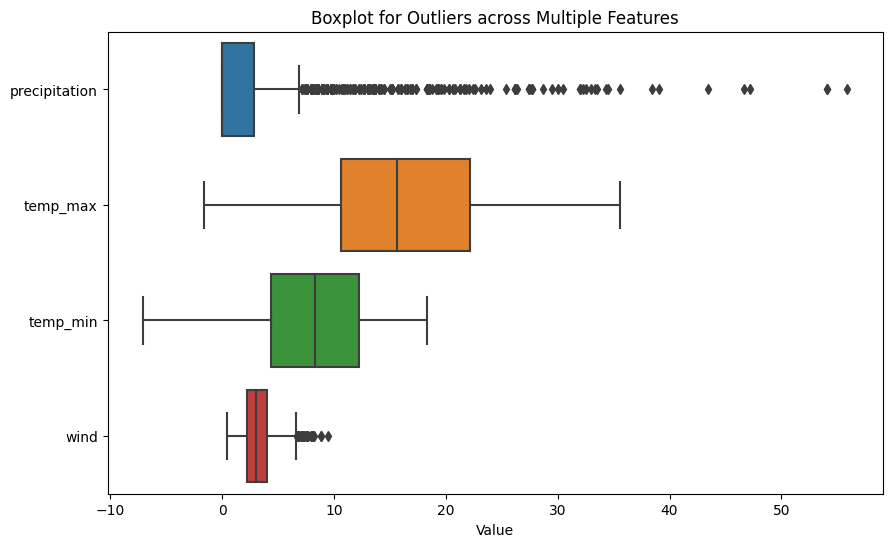

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clus, orient="h")
plt.title('Boxplot for Outliers across Multiple Features')
plt.xlabel('Value')
plt.show()

precipitation has some effect on outliers let's see how this affects clustering

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clus)

### K-Means Clustering

- **Definition:** partitioning a dataset into K distinct, non-overlapping clusters
- **Process:**
    1. iteratively assigning each data point to the nearest cluster centroid
    2. update the centroids based on the mean of the points assigned to that cluster
- **Goal:** minimize the within-cluster variance

- **Hyperparameters:**
    1. K (number of clusters to create)
        - needs to be predefined
        - choosing optimal K can significantly impact the results
        - various techniques like the elbow method or silhouette score can help in determine optimal K value

- **Pre-procesing steps needed:**
    1. Handle missing values
    2. Feature scaling
    3. Outlier removal
    4. Encoding categorical values

- **Recommended Evaluation Metrics:**
    1. Inertia(aka within-cluster sum of squares): measures how internally coherent clusters are
    2. Silhouette Score
    3. Davies-Bouldin Index

In [12]:
wcss = []
for i in range(1, 11):  # Testing k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

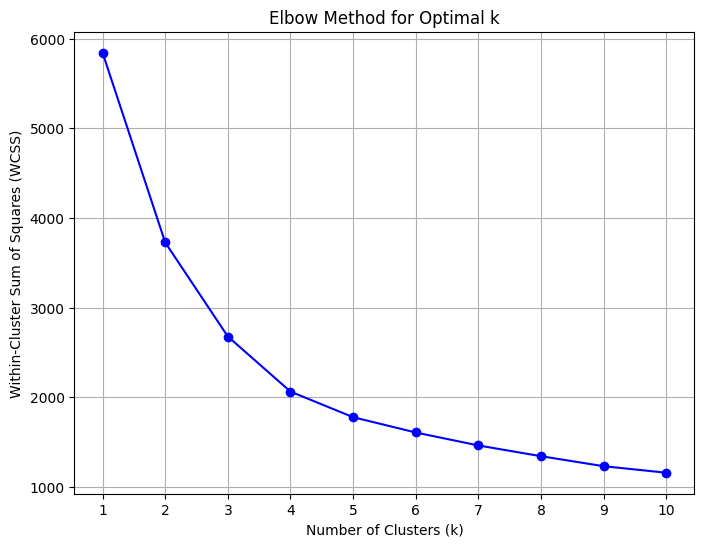

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
silhouette = silhouette_score(data_scaled, labels)
print(f'Silhouette score with 5 clusters: {silhouette}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with 5 clusters: 0.30126421419680843


In [15]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
silhouette = silhouette_score(data_scaled, labels)
print(f'Silhouette score with 5 clusters: {silhouette}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score with 5 clusters: 0.3010407897670115


### Hierarchical Clustering

- **Definition:**
    1. builds a hierarchy of clusters
    2. does not require specifying the number of clusters beforehand
    3. creates a tree of clusters known as a dendrogram

- **Process:**
    1. Initialization: Each data point starts as a separate cluster.
    2. Agglomerative Step: Similar clusters are merged based on a distance metric (e.g., Euclidean, Manhattan) until all clusters are merged into a single cluster
    3. Dendrogram Construction: dendogram is created to show the hierarchical relationship between clusters

- **Goal:** create a hierarchy of clusters that can be visually represented and used to determine the optimal number of clusters based on the dendrogram

- **Hyperparameters:**
    1. Linkage Criterion
        - decide how distances between clusters are calculated and guide the process of merging clusters
        - Common linkage methods: single linkage, complete linkage, and average linkage
- **Pre-procesing steps needed:**
    1. Handle missing values
    2. Feature scaling
    3. Outlier removal
    4. Encoding categorical values

- **Recommended Evaluation Metrics:**
    1. Silhouette Score
    3. Davies-Bouldin Index

- **Recommended Visualization Techniques:**

    1. Dendrogram: Visualize the hierarchical structure and display merging process. Helps determine the number of clusters by observing the vertical lines where the clusters merge

    2. Heatmaps: Display distance matrices to illustrate the similarity/dissimilarity between data points
    3. Cluster Heatmaps: Combine hierarchical clustering with a heatmap to visualize clustered data. This helps in identifying patterns within clusters.

In [23]:
from scipy.cluster.hierarchy import ward, median, centroid, weighted, average, complete, single, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

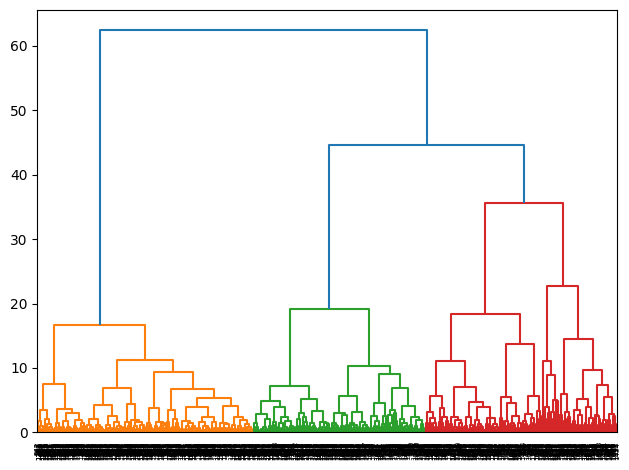

In [22]:
model = linkage(data_scaled, method = 'ward', metric = 'euclidean')
dendrogram(model)
plt.tight_layout()
plt.show()

color signifies the number of clusters. ideally our dendogram would have 5 colors. Let's use some other linkage methods and metrics to try and get these clusters

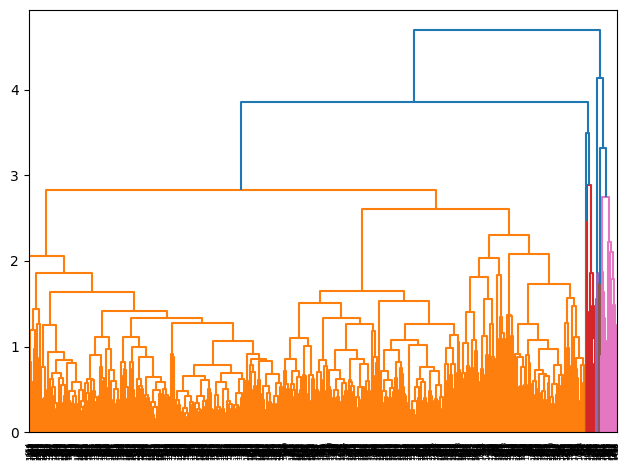

In [52]:
model = linkage(data_scaled, method = 'average')
dendrogram(model)
plt.tight_layout()
plt.show()

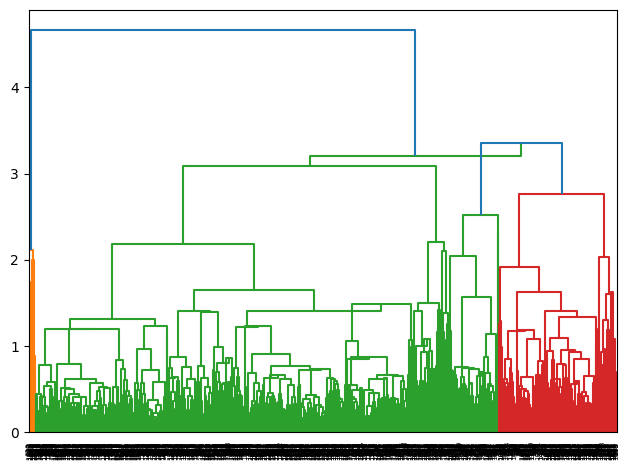

In [53]:
model = linkage(data_scaled, method = 'median')
dendrogram(model)
plt.tight_layout()
plt.show()

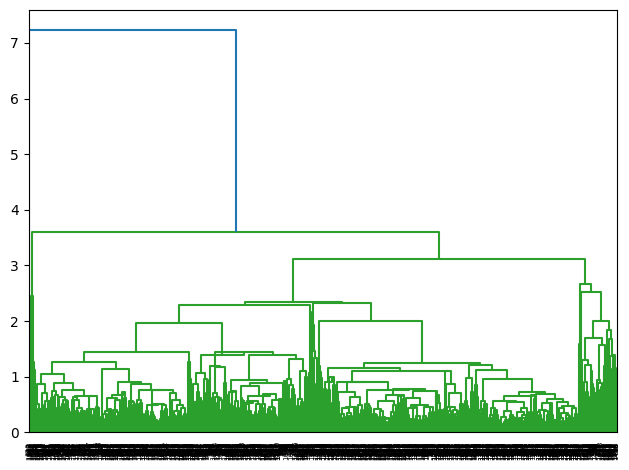

In [54]:
model = linkage(data_scaled, method = 'centroid')
dendrogram(model)
plt.tight_layout()
plt.show()

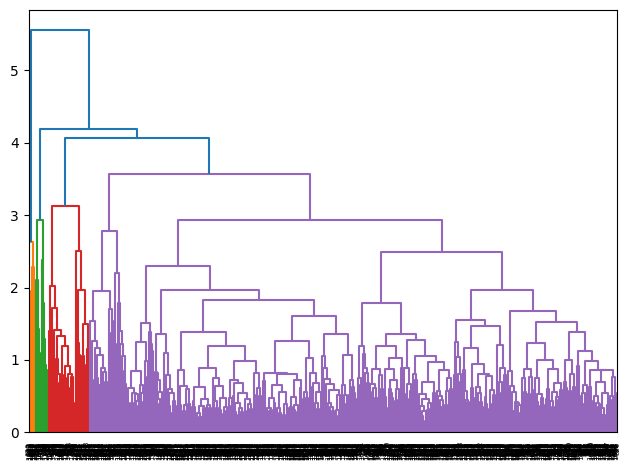

In [60]:
model = linkage(data_scaled, method = 'weighted')
dendrogram(model)
plt.tight_layout()
plt.show()

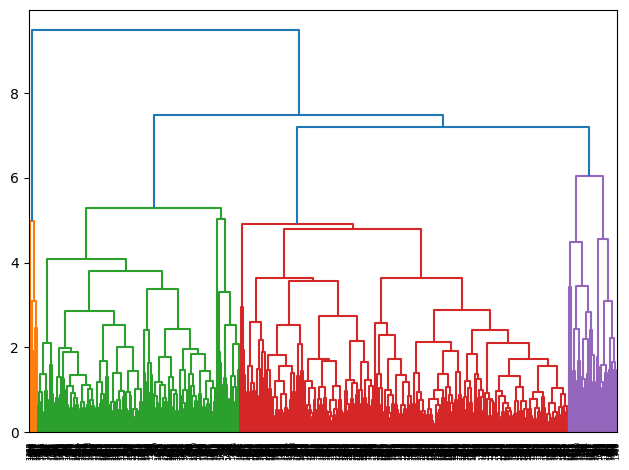

In [56]:
model = linkage(data_scaled, method = 'complete')
dendrogram(model)
plt.tight_layout()
plt.show()

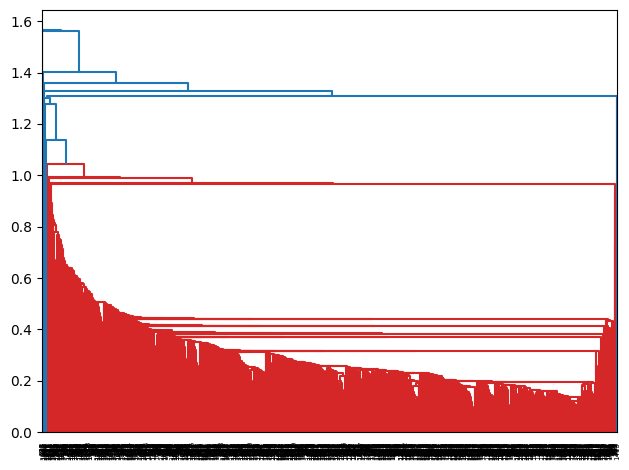

In [57]:
model = linkage(data_scaled, method = 'single')
dendrogram(model)
plt.tight_layout()
plt.show()

### Types of Linkage
1. Ward Linkage:
    - Criterion: Minimizes the variance within the clusters being merged.
    - Description: Tries to minimize the increase in variance when merging clusters. Often produces more balanced and spherical clusters.

2. Median Linkage:
     - Criterion: Computes the center of the cluster based on the medians of each dimension.
     - Description: Computes the centroid based on median values. Often less sensitive to outliers.
     - relatively less sensitive to outliers compared to mean-based methods since it's based on medians, which are less influenced by extreme values
     - often used in biological or genetic studies, particularly in phylogenetics and DNA sequence analysis
     - tends to produce clusters that are relatively spherical and more balanced and compact

3. Centroid Linkage:
    - Criterion: Computes the center of the cluster based on the means of each dimension.
    - Description: Uses the arithmetic mean of the data points to compute the centroid of clusters.
    - relatively balanced cluster sizes, may have clusters of varying shapes (not biased towards spherical clusters)
    - sensitive to outliers
    - performance may vary with data distribution (works better for normally distributed data)

4. Weighted Linkage:
    - Criterion: Considers the weighted average of the cluster positions.
    - Description: Incorporates weights on data points or clusters when computing distances.
    - Allows the inclusion of weights, providing flexibility in considering specific data points' or clusters' importance in the clustering process

5. Average Linkage:
    - Criterion: Computes the center of the cluster based on the average of each dimension.
    - Description: Computes the centroid based on the average values. more robust against outliers compared to centroid
    - Tends to create clusters with relatively balanced sizes and of varying shapes.

6. Complete  Linkage:
    - Criterion: Considers the maximum distance between clusters.
    - Description: Measures the maximum distance between any pair of data points in different clusters.
    - Tends to produce compact clusters, well seperated but elongated or irregularly shaped clusters
    - most sensitive to outliers
    - Used in scenarios where clear, compact, and well-separated clusters are desired, such as in astronomy or certain biological applications

7. Single (or Min or Nearest Point) Linkage:
    - Criterion: Considers the minimum distance between clusters.
    - Description: Measures the shortest distance between any pair of data points in different clusters.
    - Tends to create clusters that are elongated or connected in a chain-like manner and irregularly shaped
    - Sensitive to noise or outliers as it gives importance to the closest proximity


Using scipy for hierarchical clustering is preferred to using sklearn because:

Hierarchical clustering is a three step process:

- Compute the dendrogram
- Visualize and analyze
- Extract branches (cut flat clusters)

But that doesn't fit the supervised-learning-oriented API preference of sklearn, which would like everything to implement a fit, predict API.

In [48]:
agg = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward') #ward can use only euclidean metric
agg.fit(data_scaled)
labels = agg.labels_
silhouette_ = silhouette_score(data_scaled, labels)
print(f'Silhouette score of hierarchical clustering with ward linkage: {silhouette_}')

Silhouette score of hierarchical clustering with ward linkage: 0.3541793472246613


In [27]:
agg_single = AgglomerativeClustering(n_clusters=5, metric='manhattan', linkage='single') #ward can use only euclidean metric
agg_single.fit(data_scaled)
labels = agg_single.labels_
silhouette_ = silhouette_score(data_scaled, labels)
print(f'Silhouette score of hierarchical clustering with ward linkage: {silhouette_}')

Silhouette score of hierarchical clustering with ward linkage: 0.40128559980387735


In [47]:
agg_avg = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='average', distance_threshold=2.3, compute_full_tree=True) #when setting n_clusters = None, distance_threshold must be set(a float) and compute_full_trees must be true
agg_avg.fit(data_scaled)
labels = agg_avg.labels_
silhouette_ = silhouette_score(data_scaled, labels)
print(f'Silhouette score of hierarchical clustering with ward linkage: {silhouette_}')

Silhouette score of hierarchical clustering with ward linkage: 0.3279392614545269


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- **Definition:**
    - groups together points that are closely packed,
    - defines clusters based on their density in the data space
    - doesn't require specifying the number of clusters beforehand
    - particularly useful for datasets where clusters have irregular shapes or varying densities

- **Process:**
    1. Core Points & Density: identifies "core points" within the dataset based on a specified neighborhood radius (eps) and a minimum number of points (minPts) within that radius

    2. Border Points: Points within the neighborhood of a core point but not core points themselves are considered "border points" and are assigned to the cluster of their respective core point

    3. Noise Points: Points that aren't core points or border points are considered outliers or "noise points."

- **Goal:** find clusters of varying shapes and sizes based on the density of points rather than assuming spherical shapes

- **Hyperparameters:**
    1. Eps: radius that defines the neighborhood around a point. Points within this radius are considered neighbors.

    2. MinPts: The minimum number of points within Eps to qualify a point as a core point.

- **Pre-procesing steps needed:**
    1. Handle missing values
    2. Normalization/Feature scaling
    3. Encoding categorical values

- **Recommended Evaluation Metrics:**
    1. Silhouette Score

    2. Adjusted Rand Index (ARI) or Adjusted Mutual Information (AMI): Assess the similarity between true labels and cluster assignments.

- **Recommended Visualization Techniques:**

    1. Cluster Plot: Visualizing clusters using different colors/markers for different clusters.
    2. Reachability Plot: Showing points based on their reachability distance to illustrate the clustering structure.

    3. Epsilon-Neighborhood Plot: Displaying the neighborhood of points using epsilon to visualize the density-based clusters